<a href="https://colab.research.google.com/github/UCDAyoung/DataAnalysisProgramming/blob/main/ML_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%ED%99%9C%EC%9A%A9(%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[빵형의 개발도상국 유튜브 참고](https://colab.research.google.com/drive/14I8NF0974NCfIGbKx6KJEThrQtmTccPu?usp=sharing#scrollTo=NkkbMzXJqy3C)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
#iris 특징
iris['target'][5:]

array([2, 2, 2, 2, 2])

In [ ]:
iris['data'][5:]

In [34]:
import pandas as pd
df = pd.DataFrame(data = iris['data'],columns= iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
df['target'] = iris['target']
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


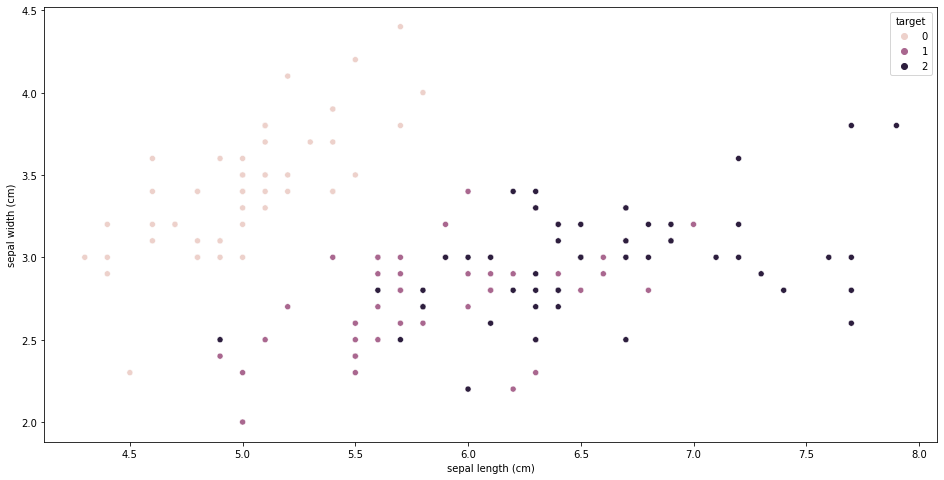

In [50]:
#seaborn은 그래프를 예쁘게 해주는 용도이다. matplotlib과 함께 사용하면 그래프를 시각화하기 좋다. 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'],hue=df['target'])
plt.show()

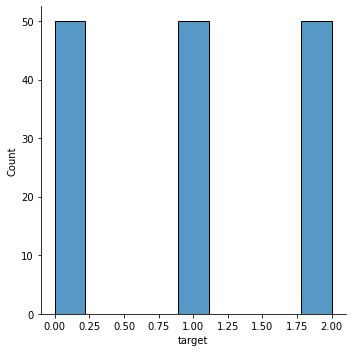

In [58]:
sns.displot(df['target'])
plt.show()

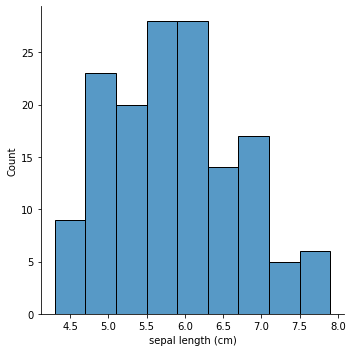

In [59]:
sns.displot(df['sepal length (cm)'])
plt.show()

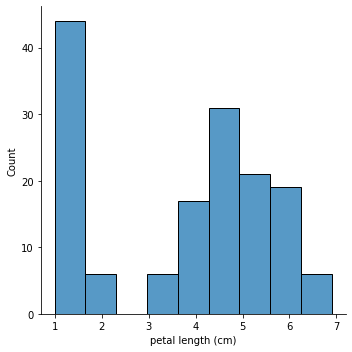

In [60]:
#데이터의 수를 확인할 수 있다. 
sns.displot(df['petal length (cm)'])
plt.show()


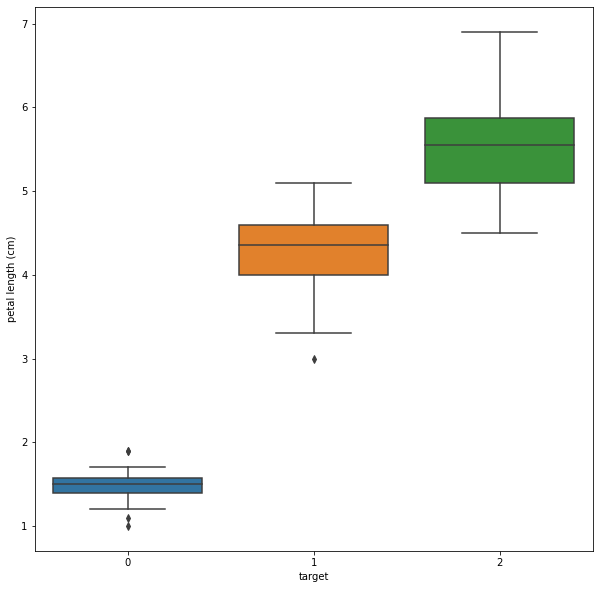

In [73]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['target'],y= df['petal length (cm)'])
plt.show()

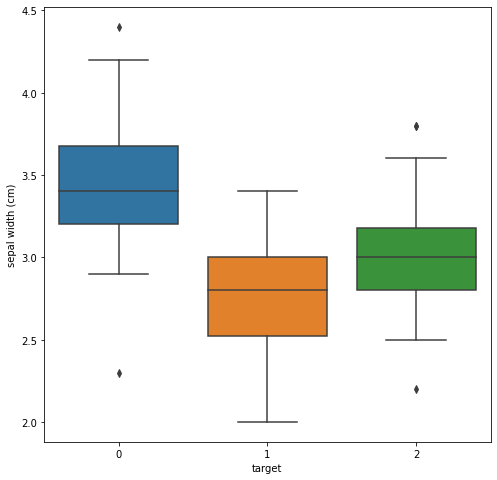

In [76]:
#boxplot을 통해 데이터의 분포도를 확인할 수 있다.
plt.figure(figsize=(8,8))
sns.boxplot(x=df['target'],y=df['sepal width (cm)'])
plt.show()

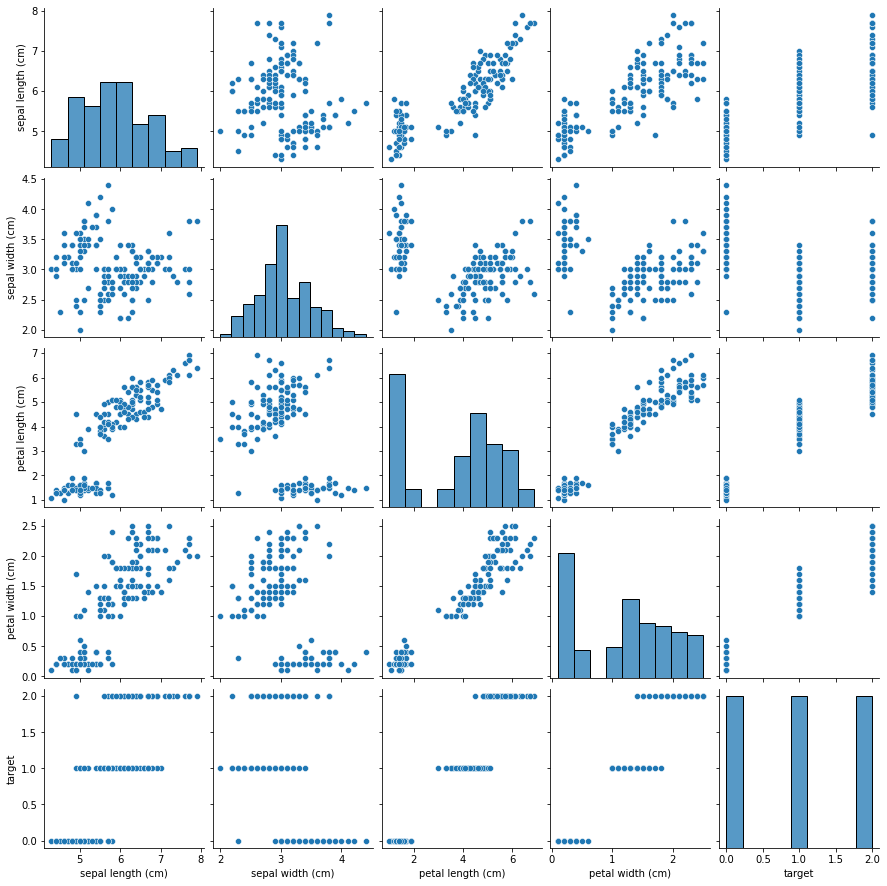

In [77]:
#데이터의 상관관계를 보여준다. 
sns.pairplot(df)

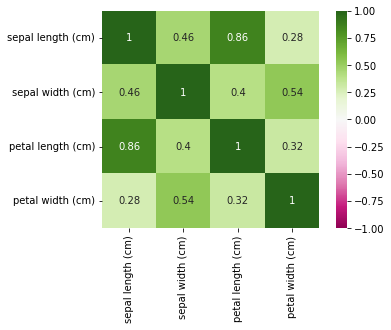

In [103]:
#correlation Maxtrix를 통해 상관관계를 확인할 수 있다.
corr = df[df['target']==2].drop(columns=['target']).corr()
corr
sns.heatmap(corr,annot=True,square=True,cmap='PiYG',vmin=-1,vmax=1)
plt.show()

In [102]:
#데이터셋 분할
#데이터셋들을 전부 학습시키는데 사용하지 않고 train(훈련) 과 validation(검증) 과 test(시험) 에 데이터를 나눠 사용한다 
#train과 validation의 비율은 대부분 8대2로 분류한다고 한다.
from sklearn.model_selection import train_test_split
target = df['target']

x_train, x_val, y_train, y_val = train_test_split(df.drop(columns=['target']),df[['target']],test_size=0.2,random_state=2021)

print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)


(120, 4) (120, 1)
(30, 4) (30, 1)


In [104]:
#데이터셋 전처리 
#데이터를 정제하는 작업임. 필요없는 데이터를 지워야 정확한 지표를 얻을 수 있기에 굉장히 중요한 과정
#정규화(Normaliztion) 표준화(Standardization) 등의 작업들이 존재 

## 정규화 Normalization

정규화는 데이터를 0과 1사이의 범위를 가지도록 만듭니다. 같은 특성의 데이터 중에서 가장 작은 값을 0으로 만들고, 가장 큰 값을 1로 만들죠. 수식으로 표현하면 아래와 같아요.

![](https://i.imgur.com/o128MWy.png)

위의 수학 시험 예를 정규화 해볼까요?

- 100점 만점 시험: 최소 0, 최대 100
- 500점 만점 시험: 최소 0, 최대 500

In [110]:
x_new = (50-0)/(100-0)
print(x_new)
x_new2 = (50-0) / (500-0)
print(x_new2)
#값은 0~1 사이로 1에 가까울 수록 크다. 

0.5
0.1


In [111]:
#정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(x_train) #target이 빠진 데이터 
#정규화 후는 배열로 바뀐다.
scaled[:5]

array([[0.31428571, 0.16666667, 0.43859649, 0.375     ],
       [0.51428571, 0.375     , 0.54385965, 0.5       ],
       [0.14285714, 0.45833333, 0.05263158, 0.04166667],
       [0.57142857, 0.33333333, 0.77192982, 0.875     ],
       [0.62857143, 0.375     , 0.59649123, 0.5       ]])

In [112]:
#다시 데이터프레임 씌우기 
x_train_scaled = pd.DataFrame(data=scaled,columns=iris['feature_names'])

x_train_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.314286,0.166667,0.438596,0.375000
1,0.514286,0.375000,0.543860,0.500000
2,0.142857,0.458333,0.052632,0.041667
3,0.571429,0.333333,0.771930,0.875000
4,0.628571,0.375000,0.596491,0.500000


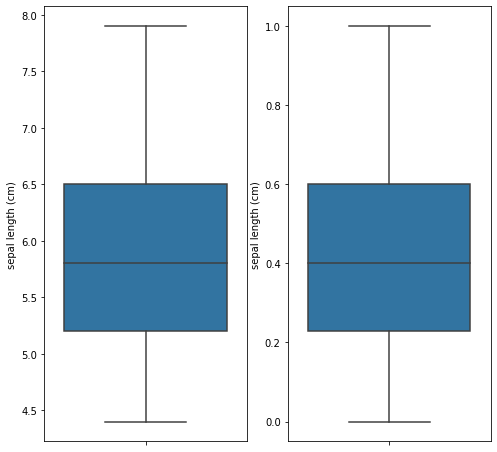

In [116]:
#박스플롯을 감싸는 틀형태임 (순서대로 실행시켜보면 확인가능) 
fig, axes = plt.subplots(nrows = 1, ncols=2 , figsize=(8,8))
#박스플롯 
sns.boxplot(y=x_train['sepal length (cm)'],ax=axes[0])
sns.boxplot(y=x_train_scaled['sepal length (cm)'],ax=axes[1])
plt.show()